In [42]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

SyntaxError: invalid syntax (463756409.py, line 1)

SyntaxError: invalid syntax (463756409.py, line 1)

### <span style='color:green'> **[done]** </span>Loading stat_model trained data:

In [33]:
loc = '../data/'
file = 'data_stats_prediction_set.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6314,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685,False,False,NaN,NaN,NaN,NaN
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685,False,False,NaN,NaN,NaN,NaN
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685,False,False,NaN,NaN,NaN,NaN


#### <span style='color:green'> **[done]** </span>Filter by weight_class:

In [34]:
weight = "Lightweight"
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

df = df[df['weight_class']==weight].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
1091,win,Jerry Bohlander,Nick Sanzo,1997-02-07,Lightweight,SUB,Neck Crank,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,False,False,1.006376,1.006376,1.006376,1.006376
1092,win,Yoshiki Takahashi,Wallid Ismail,1997-02-07,Lightweight,U-DEC,Unanimous,-0.001066,0.699316,0.006649,0.014263,-1.028683,2.279351,1.8,0.840756,1.659209,3.572132,0.001307,1.572764,0.021975,0.380937,-0.592359,True,True,NaN,NaN,NaN,NaN
1093,lose,Rainy Martinez,Jerry Bohlander,1997-02-07,Lightweight,SUB,Rear Naked Choke,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,False,False,0.034707,0.034707,0.034707,0.034707


#### <span style='color:green'> **[done]** </span>Define X & Y:

In [35]:
req_data = ['date','fighter','opponent','method','outlier','lof_outlier']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td_avg_dif','td_def_dif','sub_avg_dif',
    'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif'
    ]

df = df[req_data + X + y]
df.tail(3)

,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
1091,1997-02-07,Jerry Bohlander,Nick Sanzo,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,win
1092,1997-02-07,Yoshiki Takahashi,Wallid Ismail,U-DEC,True,True,-0.001066,0.699316,0.006649,0.014263,-1.028683,2.279351,1.8,0.840756,1.659209,3.572132,0.001307,1.572764,0.021975,0.380937,-0.592359,win
1093,1997-02-07,Rainy Martinez,Jerry Bohlander,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,lose


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [36]:
df = df[(df.outlier == False)&(df.lof_outlier == False)].reset_index(drop=True)
df.tail(3)

,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
948,1997-05-30,Tito Ortiz,Guy Mezger,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988,lose
949,1997-02-07,Jerry Bohlander,Nick Sanzo,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,win
950,1997-02-07,Rainy Martinez,Jerry Bohlander,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,lose


#### <span style='color:green'> **[done]** </span>Data status:

In [37]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(951, 23), train_set=(472, 15), validation_set=(204, 15), test_set=(275, 15)


,set,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
948,train,1997-05-30,Tito Ortiz,Guy Mezger,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988,lose
949,validation,1997-02-07,Jerry Bohlander,Nick Sanzo,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,win
950,validation,1997-02-07,Rainy Martinez,Jerry Bohlander,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,lose


In [38]:
print('Train records: %d' %len(df[df.set=='train']))
print('Train records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'train')])))
print('Train records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'train')])))
print('-----------------------------------')
print('Validation records: %d' %len(df[df.set=='validation']))
print('Validation records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'validation')])))
print('Validation records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'validation')])))
print('-----------------------------------')
print('Test records: %d' %len(df[df.set=='test']))
print('Test records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'test')])))
print('Test records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'test')])))

Train records: 472
Train records of df.result==lose : 235
Train records of df.result==win : 237
-----------------------------------
Validation records: 204
Validation records of df.result==lose : 102
Validation records of df.result==win : 102
-----------------------------------
Test records: 275
Test records of df.result==lose : 131
Test records of df.result==win : 144


## <span style='color:orange'> **[in-progress]** </span> Logistic regression model training:

## **need to fix win_strk_dif & lose_strk_dif (should be streak coming into the current fight)

<AxesSubplot:xlabel='win_strk_dif', ylabel='str_dif'>

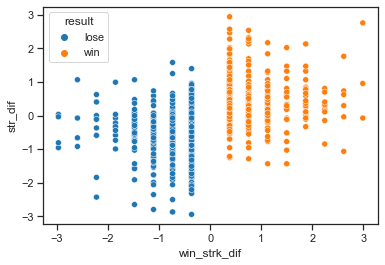

In [87]:
sns.scatterplot(data=df, x='win_strk_dif', y='str_dif', hue='result')

In [82]:
#X = #['kd_dif','str_dif','td_dif','sub_dif',
    #'td_avg_dif','td_def_dif','sub_avg_dif',
    #'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    #'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']
X = ['kd_dif','str_dif','td_dif','sub_dif','stance_win_ratio','win_perc_dif']

logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=1, solver='lbfgs')
df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
948,train,1997-05-30,Tito Ortiz,Guy Mezger,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988,lose,lose
949,validation,1997-02-07,Jerry Bohlander,Nick Sanzo,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,win,win
950,validation,1997-02-07,Rainy Martinez,Jerry Bohlander,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,lose,lose


Accuracy: 0.8364


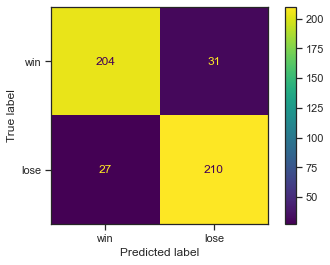

In [84]:
cm =  confusion_matrix(y_true=df.result[df.set=='train'], y_pred=df.result_pred[df.set=='train'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['win','lose'])
print('Accuracy: %.4f' %get_accuracy(act=df.result[df.set=='test'], pred=df.result_pred[df.set=='test']))
disp.plot()

In [21]:
cm = confusion_matrix(y_true=df.result[df.set=='test'], y_pred=df.result_pred[df.set=='test'])

array([[ 87,   0],
       [  0, 115]], dtype=int64)

In [133]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

FileNotFoundError: [Errno 2] No such file or directory: 'fight_data.csv'

In [96]:
# set result column to binary
for i in range(len(df)):
    
    if df.loc[i,'result'] == 'lose':
        df.loc[i,'result'] = 0
        
    if df.loc[i,'result'] == 'win':
        df.loc[i,'result'] = 1

df['result'] = df['result'].astype(int)
df.result.unique()

array([0, 1])

In [102]:
df['result_pred'] = None

In [103]:
xgboost_clf = set_xgboost_clf(X_columns=X, y_columns=y, data=df, n=10, learning_rate=0.2, subsample=0.5, max_depth=len(X))
df = set_predictions(model=xgboost_clf, data=df, X_columns=X, y_columns=y)

acc = get_accuracy(act=df.result[df.set=='train'], pred=df.result_pred[df.set=='train'])
print('Initial accuracy score: %.3f' %acc)
df.tail(3)

Initial accuracy score: 1.000


,set,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
948,train,1997-05-30,Tito Ortiz,Guy Mezger,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988,0,0
949,train,1997-02-07,Jerry Bohlander,Nick Sanzo,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,1,1
950,train,1997-02-07,Rainy Martinez,Jerry Bohlander,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,0,0


<AxesSubplot:xlabel='str_acc_dif', ylabel='str_dif'>

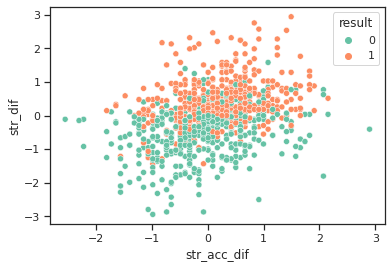

In [101]:
sns.scatterplot(data=df, x='str_acc_dif', y='str_dif', hue='result')

<AxesSubplot:xlabel='str_acc_dif', ylabel='str_dif'>

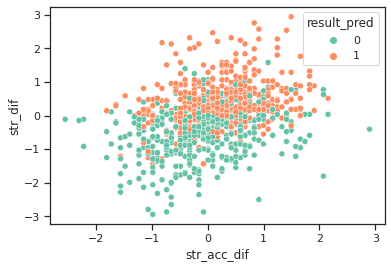

In [100]:
sns.scatterplot(data=df, x='str_acc_dif', y='str_dif', hue='result_pred')

### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [7]:
grid = {'learning_rate': [0.3,0.2,0.1,0.05,0.01],
        'subsample': [0.5,0.6,0.7,0.8,0.9],
        'n_estimators':[50,100,200,300,400],
        'train_accuracy':[None,None,None,None,None],
        'valid_accuracy':[None,None,None,None,None]
        }

grid = pd.DataFrame(data=grid)
grid

,learning_rate,subsample,n_estimators,train_accuracy,valid_accuracy
0,0.30,0.5,50,None,None
1,0.20,0.6,100,None,None
2,0.10,0.7,200,None,None
3,0.05,0.8,300,None,None
4,0.01,0.9,400,None,None


In [ ]:
xgboost_clf = set_xgboost_clf(X_columns=X, y_columns=y, data=df, n=n_estimators, learning_rate=learning_rate, subsample=subsample, max_depth=len(X))
df = set_predictions(model=xgboost_clf, X_columns=X, y_columns=y, data=df)

In [28]:
>>>>>>>>>>>>>>>>>>>>

SyntaxError: invalid syntax (<ipython-input-28-d3d630fd6719>, line 1)

In [15]:
train_index = df.index[df.set=='train']
valid_index = df.index[df.set=='validation']

i = 0
for learning_rate in tqdm(grid['learning_rate']):
    for subsample in grid['subsample']:
        for n_estimators in grid['n_estimators']:
            
            xgboost_clf = set_xgboost_clf(X_columns=X, y_columns=y, data=df, n=n_estimators, learning_rate=learning_rate, subsample=subsample, max_depth=len(X))
            df = set_predictions(model=xgboost_clf, X_columns=X, y_columns=y, data=df)
            
            grid['train_accuracy'][i] = get_accuracy(act=df.loc[train_index,'result'], pred=df.loc[train_index,'result_pred'])
            grid['valid_accuracy'][i] = get_accuracy(act=df.loc[valid_index,'result'], pred=df.loc[valid_index,'result_pred'])
                
    i += 1  
    
grid = grid[['learning_rate','subsample','n_estimators','train_accuracy','valid_accuracy']].copy()
grid

  0%|          | 0/5 [00:00<?, ?it/s]/homes/sagic/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/homes/sagic/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/homes/sagic/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,learning_rate,subsample,n_estimators,train_accuracy,valid_accuracy
0,0.30,0.5,50,1.0,1.0
1,0.20,0.6,100,1.0,1.0
2,0.10,0.7,200,1.0,1.0
3,0.05,0.8,300,1.0,1.0
4,0.01,0.9,400,1.0,1.0


<AxesSubplot:xlabel='learning_rate', ylabel='train_accuracy'>

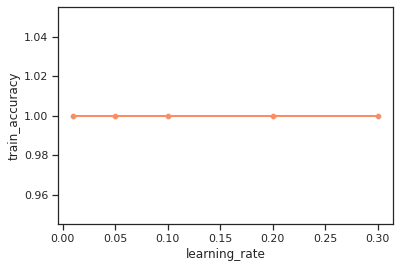

In [18]:
sns.lineplot( data=grid, x=model_param[i], y='train_accuracy')
sns.scatterplot( data=grid, x=model_param[i], y='train_accuracy')
sns.lineplot( data=grid, x=model_param[i], y='valid_accuracy')
sns.scatterplot( data=grid, x=model_param[i], y='valid_accuracy')

### <span style='color:orange'> **[in-progress]** </span>GridSearch (=Parameter tuning):

In [19]:
parameters = {'learning_rate': [0.05, 0.1, 0.15],
              'max_depth': [2, 3, 6],
              'subsample': [0.7, 0.8, 0.9],
              'n_estimators':[100, 200, 300]
}

xgboost_clf = XGBClassifier() #objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgboost_clf, param_grid=parameters, cv=5,error_score='raise')

X_train = df[X][df.set=='train']
y_train = df[y][df.set=='train']
grid_search.fit(X_train,y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}
Best score:  1.0


In [148]:
grid = pd.DataFrame(grid_search.cv_results_['params'])
grid['accuracy'] = grid_search.cv_results_['mean_test_score']
grid[grid.accuracy==np.max(grid.accuracy)]

,learning_rate,max_depth,n_estimators,subsample,accuracy
4,0.05,2,200,0.8,0.867318


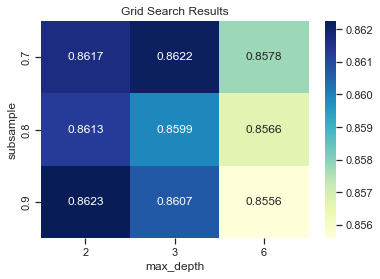

In [150]:
# Create a pivot table of the results
X_axis = 'max_depth'
y_axis = 'subsample'
table = pd.pivot_table(grid, values='accuracy', index=y_axis, columns=X_axis)

# Create a heatmap plot of the results
sns.heatmap(table, cmap='YlGnBu', annot=True, fmt='.4g')
plt.title('Grid Search Results')
plt.xlabel(X_axis)
plt.ylabel(y_axis)
plt.show()


In [220]:
>>>>>

SyntaxError: invalid syntax (<ipython-input-220-77d396f2102f>, line 1)

## <span style='color:green'> **[done]** </span> Random forest classifier model training:

In [235]:
rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=10)
df = set_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win,win
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win,win
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win,win


Accuracy = 0.841658


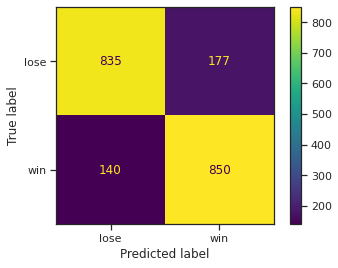

In [236]:
get_model_evaluation(data=df,y_column='result')

#### <span style='color:green'> **[done]** </span> Tune Model parameters:

In [237]:
sum_table = pd.DataFrame(columns=['n_estimators','accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256]):
    sum_table = pd.concat([sum_table,get_clf_grad_desc_step( X_columns=X, y_columns=y, data=df, neighbors=n)],ignore_index=True)

sum_table.tail(5)

100%|██████████| 8/8 [00:03<00:00,  2.42it/s]


,n_estimators,accuracy
3,16,0.855032
4,32,0.851513
5,64,0.855735
6,128,0.865588
7,256,0.861365


,n_estimators,accuracy
0,128,0.865588


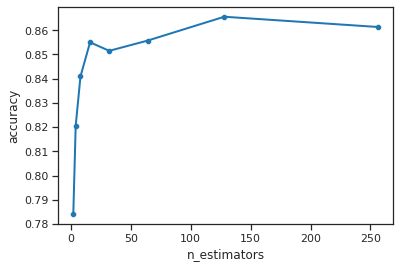

In [238]:
sns.scatterplot(data=sum_table, x='n_estimators', y='accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='accuracy')

t = sum_table[sum_table.accuracy == np.max(sum_table['accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'accuracy']
t

#### <span style='color:green'> **[done]** </span> Train model with chosen parameters & 10-fold Cross Validation:

In [239]:
k = 10
size = len(df)
batch = int(size/k)
acc = []

for i in tqdm(range(0,size-batch,batch)):
    test_start = i
    test_end = i + batch - 1
    df.loc[:,'set'] = 'train'
    df.loc[test_start:test_end,'set'] = 'test'
    rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=opt_n_estimators)
    df = set_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y) 
    y_test_act = df['result'][df.set=='test']
    y_test_pred = df['result_pred'][df.set=='test']
    acc.append(get_accuracy(act=y_test_act, pred=y_test_pred))

opt_acc = np.mean(acc)    
print('%d-Fold cross-validation model accuracy: %.4f' %(k,opt_acc))

100%|██████████| 10/10 [00:13<00:00,  1.39s/it]

10-Fold cross-validation model accuracy: 0.8670


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [240]:
save_trained_model(model=rf_clf,filename_path='../global_variables/result_pred_random_forest_clf')

../global_variables/result_pred_random_forest_clf.pkl saved.


#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [10]:
gp = pd.read_csv('../global_variables/ml_models_parameters.csv')
gp = gp[gp.ml_model != 'result_random_forest_classifier'].reset_index(drop=True)

param = pd.DataFrame(data={'ml_model':['result_random_forest_classifier'],
                          'parameter_name':['n_estimator'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )
gp = pd.concat([gp,param],ignore_index=True)
gp.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')
gp

../global_variables/ml_models_parameters.csv saved.


,ml_model,parameter_name,value,accuracy
0,stats_random_forest_regressor,n_estimators,256,0.886900
1,method_random_forest_classifier,n_estimator,64,0.722355
2,result_random_forest_classifier,n_estimator,128,0.867013


#### <span style='color:green'> **[done]** </span> saving data:

In [11]:
df.to_csv('../data/fight_result_data_trained.csv',index=None)
print('../data/fight_result_data_trained.csv saved.')

../data/fight_result_data_trained.csv saved.
